In [63]:
#############
## IMPORTS ##
#############

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.linear_model import LogisticRegression

In [64]:
#####################################
## READING RED AND WHITE WINE DATA ##
#####################################
redWineData = pd.read_csv("./data/winequality-red.csv")
whiteWineData = pd.read_csv("./data/winequality-white.csv")

In [78]:
######################################
## SUMMARY OF RED & WHITE WINE DATA ##
######################################
redSummary = redWineData.describe()
whiteSummary = whiteWineData.describe()
redQualityMean = redSummary['quality']['mean']
redQualityStd = redSummary['quality']['std']
whiteQualityMean = whiteSummary['quality']['mean']
whiteQualityStd = whiteSummary['quality']['std']
redAlcoholMean = redSummary['alcohol']['mean']
redAlcoholStd = redSummary['alcohol']['std']
whiteAlcoholMean = whiteSummary['alcohol']['mean']
whiteAlcoholStd = whiteSummary['alcohol']['std']
# Printing out the mean and std values
print("The mean for the quality of red wine is: " + str(redQualityMean))
print("The std for the quality of red wine is: " + str(redQualityStd))
print("The mean for the quality of white wine is: " + str(whiteQualityMean))
print("The std for the quality of white wine is: " + str(whiteQualityStd))
print("The mean for the alcohol in the red wine is: " + str(redAlcoholMean))
print("The std for alcohol in red wine is: " + str(redAlcoholStd))
print("The mean for the slcohol in the white wine is: " + str(whiteAlcoholMean))
print("The std for alcohol in the white wine is: " + str(whiteAlcoholStd))


The mean for the quality of red wine is: 5.6360225140712945
The std for the quality of red wine is: 0.807569439734705
The mean for the quality of white wine is: 5.87790935075541
The std for the quality of white wine is: 0.8856385749678312
The mean for the alcohol in the red wine is: 10.422983114446529
The std for alcohol in red wine is: 1.0656675818473946
The mean for the slcohol in the white wine is: 10.514267047774602
The std for alcohol in the white wine is: 1.230620567757318


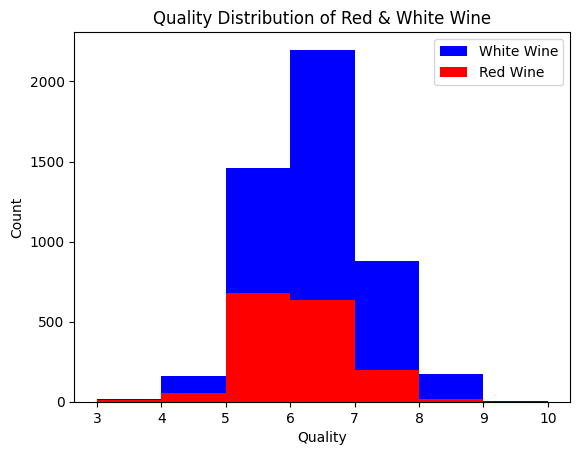

In [77]:
##################################################
## COMPARING THE QUALITY OF RED AND WHITE WINES ##
##################################################
# Getting the number of red wines with their respective qualities.
plt.hist(whiteWineData['quality'], label='White Wine', color='blue', bins=np.arange(3,11,1))
plt.hist(redWineData['quality'], label='Red Wine', color='red', bins=np.arange(3,11,1))
# Making the plot.
plt.legend(loc='upper right')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Quality Distribution of Red & White Wine')
plt.savefig('./figures/Quality-Distribution.jpeg')
plt.show()

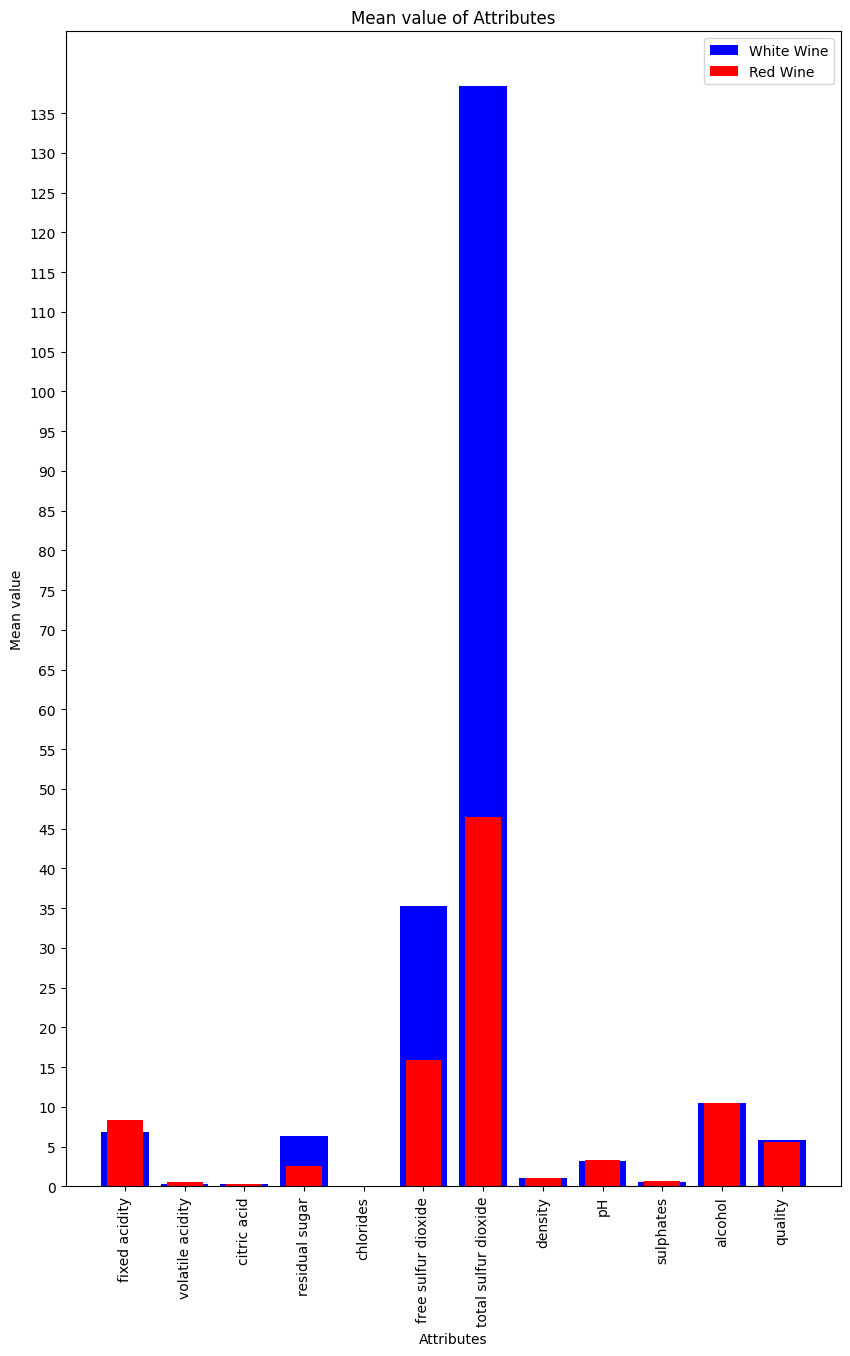

In [6]:
########################################################################################
## CREATING BAR CHARTS TO COMPARE THE MEANS OF ALL ATTRIUBUTES IN RED AND WHITE WINES ##
########################################################################################
# Creating a figure of a particular size.
plt.figure(figsize=(10,15))
# Adding the white win data to the bar chart.
whiteBar = plt.bar(whiteSummary.columns, whiteSummary.loc['mean'], label="White Wine", color="blue")
# Adding the red white data to the bar chart. 
redBar = plt.bar(redSummary.columns, redSummary.loc['mean'], label="Red Wine", color="red", width=0.6)
# Styling the bar chart.
redBar.set_label = 'Red Wine'
whiteBar.set_label = 'White Wine'
# Styling the graph
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.yticks(np.arange(0,140,5))
plt.legend()
plt.xlabel("Attributes")
plt.ylabel("Mean value")
plt.title("Mean value of Attributes")
plt.savefig('./figures/Mean-Value-of-Attributes.jpeg')

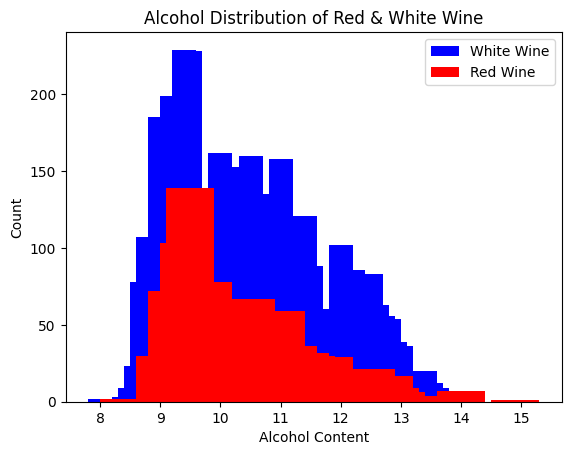

In [14]:
#########################################################
## COMPARING THE ALCOHOL CONTENT OF RED AND WHITE WINE ##
#########################################################
# Getting the number of white wines with their respective alcohol content.
whiteAlcoholCount = pd.value_counts(whiteWineData['alcohol'])
whiteAlcoholNumbers = whiteAlcoholCount.keys().tolist()
whiteAlcoholFrequency = list(whiteAlcoholCount)
whiteAlcoholBar = plt.bar(whiteAlcoholNumbers, whiteAlcoholFrequency, width=0.4, color='blue', label='White Wine')
# Getting the number of red wines with their respective alcohol content. 
redAlcoholCount = pd.value_counts(redWineData['alcohol'])
redAlcoholNumbers = redAlcoholCount.keys().tolist()
redAlcoholFrequency = list(redAlcoholCount)
redAlcoholBar = plt.bar(redAlcoholNumbers, redAlcoholFrequency, color='red', label='Red Wine')
# Making the plot.
plt.legend(loc='upper right')
plt.xlabel('Alcohol Content')
plt.ylabel('Count')
plt.title('Alcohol Distribution of Red & White Wine')
plt.savefig('./figures/Alcohol-Distribution.jpeg')
plt.show()


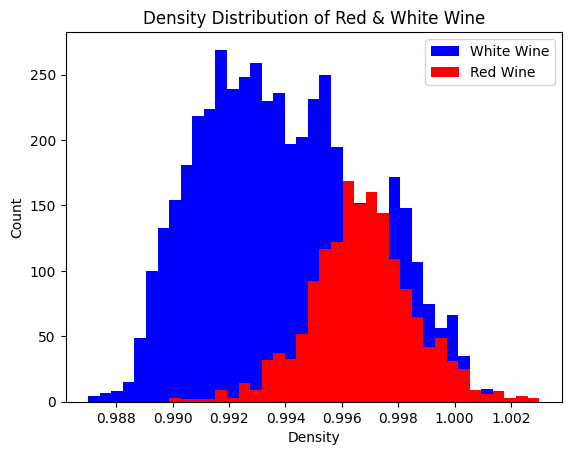

In [37]:
#################################################
## COMPARING THE DENSITY OF RED AND WHITE WINE ##
#################################################
# Getting the number of white wines with their respective densities
whiteHistogram = plt.hist(whiteWineData['density'], bins=np.linspace(0.987,1.003,40), color='blue', label="White Wine")
# Getting the number of red wines with their respective densities
redHistogram = plt.hist(redWineData['density'], bins=np.linspace(0.987,1.003,40), color='red',label="Red Wine")
# Making the plot.
plt.legend(loc='upper right')
plt.xlabel('Density')
plt.ylabel('Count')
plt.title('Density Distribution of Red & White Wine')
plt.savefig('./figures/Density-Distribution.jpeg')
plt.show()# 

In [90]:
##########################################################################
## SPLITTING DATA INTO TRAINING DATA, VALIDATION DATA & PREDICTION DATA ##
##########################################################################
# Making the fractions that are used to split the data into training, testing and validation data.
trainingData = 2/3
validationData = 1/6
predictionData = 1/6
# Getting the dimensions of the redWineData and the whiteWineData.
redDimension = redWineData.shape
whiteDimension = whiteWineData.shape
# Getting the number of row that would be the cutoff for red and white wine trianing and validation data. 
redTrainingRows = redDimension[0] * trainingData
redValidationRows = redTrainingRows + (redDimension[0] * validationData)
whiteTrainingRows = whiteDimension[0] * trainingData
whiteValidationRows = whiteTrainingRows + (whiteDimension[0] * validationData)
# Getting the training and y data for the red wine. 
redTrainingData = redWineData.loc[0:redTrainingRows]
redQualityTrainingData = redTrainingData['quality']
redTrainingData = redTrainingData.drop('quality', axis=1)
# Getting the validation and y data for red wine.
redValidationData = redWineData.loc[redTrainingRows+1:redValidationRows]
redQualityValidationData = redValidationData['quality']
redValidationData = redValidationData.drop('quality', axis=1)
# Getting the test and y data for red wine. 
redTestData = redWineData.loc[redValidationRows+1:]
redQualityPredictionData = redTestData['quality']
redTestData = redTestData.drop('quality', axis=1)
# Getting the training and y data for the white wine. 
whiteTrainingData = whiteWineData.loc[0:whiteTrainingRows]
whiteQualityTrainingData = whiteTrainingData['quality']
whiteTrainingData = whiteTrainingData.drop('quality', axis=1)
# Getting the validation and y data for red wine.
whiteValidationData = whiteWineData.loc[whiteTrainingRows+1:whiteValidationRows]
whiteQualityValidationData = whiteValidationData['quality']
whiteValidationData = whiteValidationData.drop('quality', axis=1)
# Getting the test and y data for red wine. 
whiteTestData = whiteWineData.loc[whiteValidationRows+1:]
whiteQualityPredictionData = whiteTestData['quality']
whiteTestData = whiteTestData.drop('quality', axis=1)

0       5
1       5
2       5
3       6
4       5
       ..
1062    6
1063    6
1064    6
1065    6
1066    7
Name: quality, Length: 1067, dtype: int64


In [102]:
##############################
## STANDARDIZING THE X DATA ##
##############################
# Does it make sense to scale the whole dataaset, or does it make sense to scale each individual feature one at a time?
# I don't see the use to scale the entire dataset around one common mean, rather than scaling to the mean of each individual feature. 
# The only was you would scale the entire dataset if you had very similar features, otherwise I think it makes more sense to scale and fit each feature individually. 

# Creating a standard scalar object. 
sc = StandardScaler()
# Scaling all the training, test and validation data.
trial = sc.fit_transform(np.array(redTrainingData['density']).reshape(-1,1))
redTrainingDataScaled = sc.fit_transform(redTrainingData)
redValidationDataScaled = sc.fit_transform(redValidationData)
redTestDataScaled = sc.fit_transform(redTestData)
whiteTrainingDataScaled = sc.fit_transform(whiteTrainingData)
whiteValidationDataScaled = sc.fit_transform(whiteValidationData)
whiteTestDataScaled = sc.fit_transform(whiteTestData)

In [107]:
############################
## NORMALIZING THE X DATA ##
############################
# i don't see the use of the scaling and normalize. Should do one or the either, not both. 
# Normalize is better as you can scale each feature independently.
# I think this is better than scaling the data. 

a = preprocessing.normalize(redTrainingData, axis=0)
print(a[0])
b = preprocessing.normalize(redValidationData, axis=0)
c = preprocessing.normalize(redTestData, axis=0)
d = preprocessing.normalize(whiteTrainingData, axis=0)
e = preprocessing.normalize(whiteValidationDataScaled, axis=0)
f = preprocessing.normalize(whiteTestDataScaled, axis=0)
redTrainingDataNormalized = pd.DataFrame(a, columns = redTrainingData.columns)
redValidationDataNormalized = pd.DataFrame(b, columns = redValidationData.columns)
redTestDataNormalized = pd.DataFrame(c, columns = redTestData.columns)
whiteTrainingDataNormalized = pd.DataFrame(d, columns = whiteTrainingData.columns)
whiteValidationDataNormalized = pd.DataFrame(e, columns = whiteValidationData.columns)
whiteTestDataNormalized = pd.DataFrame(f, columns = whiteTestData.columns)

[0.02549265 0.03859722 0.         0.02044046 0.02262147 0.01858717
 0.01804485 0.03063099 0.03254517 0.02481229 0.02779844]


[[-2.94295501e-02 -1.01319857e-01]
 [-1.19335241e-01  2.45278730e-02]
 [-9.34254811e-02 -6.59316433e-02]
 [-9.34254811e-02 -6.59316433e-02]
 [-9.34254811e-02 -6.59316433e-02]
 [-4.48121204e-02 -1.83480608e-02]
 [-4.48121204e-02 -1.83480608e-02]
 [-4.48121204e-02 -1.83480608e-02]
 [-3.02545540e-02 -3.85823001e-02]
 [-4.48121204e-02 -1.83480608e-02]
 [ 1.77867861e-01  1.28994365e-01]
 [ 2.50460624e-02  3.59256531e-02]
 [-1.63628783e-01 -6.86850481e-03]
 [-4.87057149e-02 -8.52357314e-02]
 [-4.87057149e-02 -8.52357314e-02]
 [-5.46241515e-02 -5.47766164e-02]
 [ 9.29470040e-02 -3.28332011e-02]
 [-1.11120998e-01 -1.16070208e-02]
 [-2.28538950e-03 -8.34262999e-02]
 [-2.28538950e-03 -8.34262999e-02]
 [-4.27589647e-02 -4.32141203e-02]
 [-5.99298607e-02  3.02923954e-02]
 [-6.49652710e-02  2.94629671e-02]
 [-1.18891934e-02  6.99012287e-03]
 [ 1.95951923e-01 -1.59171879e-01]
 [ 1.67912005e-01  1.09860094e-01]
 [ 8.41068495e-02  4.36660944e-02]
 [ 3.98446342e-02 -9.40982321e-02]
 [ 1.67912005e-01  1

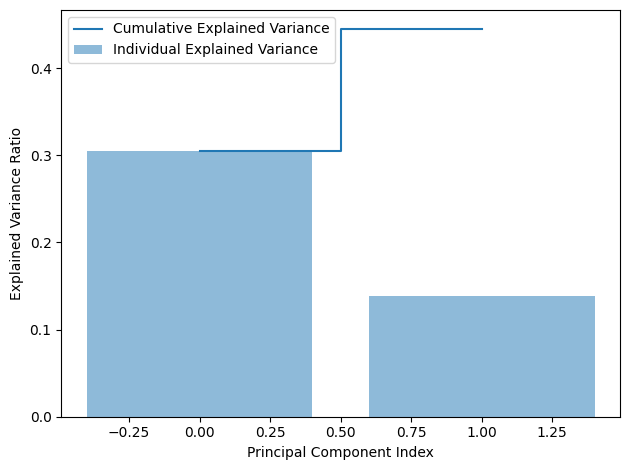

[0.30530925 0.13904653]


In [87]:
#########################################################
## PRINCIPAL COMPONENT ANALYSIS FOR RED AND WHITE WINE ##
#########################################################
# Making the PCA object, and applying the first 2 components of it.
pca = PCA(2)
# Applying the PCA to the normalized red and white wine data.
redTrainingDataPCA = pca.fit_transform(redTrainingDataNormalized)
redValidationDataPCA = pca.fit_transform(redValidationDataNormalized)
redTestDataPCA = pca.fit_transform(redTestDataNormalized)
whiteTrainingDataPCA = pca.fit_transform(whiteTrainingDataNormalized)
whiteValidationDataPCA = pca.fit_transform(whiteValidationDataNormalized)
whiteTestDataPCA = pca.fit_transform(whiteTestDataNormalized)
print(redTestDataPCA)
# Getting the explained variance ratio the trianing data.
explainedVariance = pca.explained_variance_ratio_
# Getting the cumilative explained variance ratio.
cumSumExplainedVariance = np.cumsum(explainedVariance)
# Making the plot to compare the explained variance and the cumilative explained variance.
plt.bar(range(0,len(explainedVariance)), explainedVariance, alpha=0.5, align='center', label='Individual Explained Variance')
plt.step(range(0,len(cumSumExplainedVariance)), cumSumExplainedVariance, where='mid',label='Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
print(pca.explained_variance_ratio_)

In [ ]:
###############################
## LOGISTIC REGRESSION MODEL ##
###############################
# Making a logistic regression object.
redWineLR = LogisticRegression()
# Fitting the model with a normalized x data, and training y data.
redWineLR.fit(redTrainingDataPCA,)

In [1]:
print("Hello World")

Hello World
